#### Importing Libraries and Dataset

In [1]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN 
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
import seaborn as sns
import pickle
import functools
import fastdtw
import scipy.spatial.distance as sd
#from datetime import datetime
consumption_df = pd.read_csv('Final Datasets/energy_consumption_standardized.csv')
consumption_df

2022-06-09 18:34:23.813940: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 18:34:23.813975: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,Unnamed: 0,energy_kWh,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy,Unnamed: 0.1,timestamp,House Number
0,0,0.175271,0.118911,-0.123302,0.138053,0.161630,0.160165,0,2012-06-01 01:00:00,1
1,1,-0.459110,-0.465316,-0.113659,-0.467739,-0.460916,-0.461745,1,2012-06-01 02:00:00,1
2,2,-0.397938,-0.408980,-0.114589,-0.409323,-0.400884,-0.401775,2,2012-06-01 03:00:00,1
3,3,-0.470439,-0.475749,-0.113487,-0.478556,-0.472032,-0.472851,3,2012-06-01 04:00:00,1
4,4,-0.439852,-0.447581,-0.113952,-0.449348,-0.442017,-0.442866,4,2012-06-01 05:00:00,1
...,...,...,...,...,...,...,...,...,...,...
611013,611013,3.085724,7.759342,8.208313,7.032194,5.869181,5.952498,123761,2020-05-19 19:00:00,28
611014,611014,2.926675,7.508958,8.212446,6.772569,5.602376,5.685965,123762,2020-05-19 20:00:00,28
611015,611015,1.641033,5.485027,8.245849,4.673935,3.445701,3.531490,123763,2020-05-19 21:00:00,28
611016,611016,1.853098,5.818871,8.240339,5.020101,3.801441,3.886867,123764,2020-05-19 22:00:00,28


In [2]:
consumption_df[consumption_df['House Number'].isin([2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25])]

,Unnamed: 0,energy_kWh,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy,Unnamed: 0.1,timestamp,House Number
29231,29231,-0.834075,-0.810636,-0.107960,-0.825805,-0.828884,-0.829339,29231,2016-06-09 00:00:00,2
29232,29232,-0.845403,-0.821069,-0.107788,-0.836622,-0.840001,-0.840444,29232,2016-06-09 01:00:00,2
29233,29233,-0.845403,-0.821069,-0.107788,-0.836622,-0.840001,-0.840444,29233,2016-06-09 02:00:00,2
29234,29234,-0.834075,-0.810636,-0.107960,-0.825805,-0.828884,-0.829339,29234,2016-06-09 03:00:00,2
29235,29235,-0.834075,-0.810636,-0.107960,-0.825805,-0.828884,-0.829339,29235,2016-06-09 04:00:00,2
...,...,...,...,...,...,...,...,...,...,...
580515,580515,-0.280804,2.459563,8.295782,1.536801,0.221805,0.310882,93187,2020-05-14 19:00:00,25
580516,580516,-0.307312,2.417832,8.296471,1.493530,0.177337,0.266459,93188,2020-05-14 20:00:00,25
580517,580517,0.050547,2.981194,8.287173,2.077686,0.777649,0.866159,93189,2020-05-14 21:00:00,25
580518,580518,0.448169,3.607153,8.276842,2.726748,1.444662,1.532492,93190,2020-05-14 22:00:00,25


In [3]:
if 'Unnamed: 0' in consumption_df.columns:
    consumption_df.drop('Unnamed: 0',axis=1, inplace = True)

In [4]:
consumption_df

,energy_kWh,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy,Unnamed: 0.1,timestamp,House Number
0,0.175271,0.118911,-0.123302,0.138053,0.161630,0.160165,0,2012-06-01 01:00:00,1
1,-0.459110,-0.465316,-0.113659,-0.467739,-0.460916,-0.461745,1,2012-06-01 02:00:00,1
2,-0.397938,-0.408980,-0.114589,-0.409323,-0.400884,-0.401775,2,2012-06-01 03:00:00,1
3,-0.470439,-0.475749,-0.113487,-0.478556,-0.472032,-0.472851,3,2012-06-01 04:00:00,1
4,-0.439852,-0.447581,-0.113952,-0.449348,-0.442017,-0.442866,4,2012-06-01 05:00:00,1
...,...,...,...,...,...,...,...,...,...
611013,3.085724,7.759342,8.208313,7.032194,5.869181,5.952498,123761,2020-05-19 19:00:00,28
611014,2.926675,7.508958,8.212446,6.772569,5.602376,5.685965,123762,2020-05-19 20:00:00,28
611015,1.641033,5.485027,8.245849,4.673935,3.445701,3.531490,123763,2020-05-19 21:00:00,28
611016,1.853098,5.818871,8.240339,5.020101,3.801441,3.886867,123764,2020-05-19 22:00:00,28


#### Converting Dataset to House-wise dictionary

In [5]:
house_wise_consumption = dict()
for house_number in consumption_df['House Number'].unique():
    house_data = consumption_df[consumption_df['House Number'] == house_number]
    house_wise_consumption[house_number] = house_data.copy()
house_wise_consumption[1]
# house_wise_consumption[14]['timestamp'].iloc[0]
# house_wise_consumption[14]['timestamp'].iloc[-1]
# house_wise_consumption[14]['House Number'].iloc[0]

,energy_kWh,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy,Unnamed: 0.1,timestamp,House Number
0,0.175271,0.118911,-0.123302,0.138053,0.161630,0.160165,0,2012-06-01 01:00:00,1
1,-0.459110,-0.465316,-0.113659,-0.467739,-0.460916,-0.461745,1,2012-06-01 02:00:00,1
2,-0.397938,-0.408980,-0.114589,-0.409323,-0.400884,-0.401775,2,2012-06-01 03:00:00,1
3,-0.470439,-0.475749,-0.113487,-0.478556,-0.472032,-0.472851,3,2012-06-01 04:00:00,1
4,-0.439852,-0.447581,-0.113952,-0.449348,-0.442017,-0.442866,4,2012-06-01 05:00:00,1
...,...,...,...,...,...,...,...,...,...
29226,1.410050,1.256069,-0.142069,1.317183,1.373370,1.370670,29226,2015-10-02 20:00:00,1
29227,0.894615,0.781384,-0.134235,0.824977,0.867552,0.865367,29227,2015-10-02 21:00:00,1
29228,0.524181,0.440237,-0.128605,0.471238,0.504030,0.502216,29228,2015-10-02 22:00:00,1
29229,0.698636,0.600899,-0.131256,0.637831,0.675230,0.673241,29229,2015-10-02 23:00:00,1


In [6]:
# TODO: Print the usage pattern in form of a graph
# Each cluster represents one line in the time series graph
# Plot november consumption (2017) values for each house belonging to the same cluster in a single graph
# Also plot for the whole year (annual 2017) for each house belonging to the same cluster in a single graph

#### Comparing Timestamps for clustering

In [7]:
timestamp_comparison = list()
for house in house_wise_consumption:
    first_timestamp = house_wise_consumption[house]['timestamp'].iloc[0]
    last_timestamp = house_wise_consumption[house]['timestamp'].iloc[-1]
    timestamp_comparison.append([house, first_timestamp, last_timestamp])
timestamp_comparison
timestamp_comparison_df = pd.DataFrame(timestamp_comparison, columns = ['House', 'First Timestamp', 'Last Timestamp'])
timestamp_comparison_df

,House,First Timestamp,Last Timestamp
0,1,2012-06-01 01:00:00,2015-10-03 00:00:00
1,2,2016-06-09 00:00:00,2019-11-20 23:00:00
2,3,2015-01-27 00:00:00,2018-01-29 23:00:00
3,4,2015-01-30 00:00:00,2018-01-29 23:00:00
4,5,2015-01-30 00:00:00,2018-01-29 23:00:00
5,6,2015-01-30 00:00:00,2018-01-29 23:00:00
6,7,2015-05-30 00:00:00,2018-01-29 23:00:00
7,8,2015-02-21 00:00:00,2018-02-20 23:00:00
8,9,2015-05-01 00:00:00,2018-02-21 23:00:00
9,10,2015-02-21 00:00:00,2018-02-20 23:00:00


In [8]:
# houses_with_ts = []
# sample_timestamp = '2017-11-01 00:00:00'
# for house in house_wise_consumption:
#     if sample_timestamp in house_wise_consumption[house]['timestamp'].unique():
#         houses_with_ts.append(house)
# len(houses_with_ts)
#house_wise_consumption[8][house_wise_consumption[8]['timestamp'] >= '2017-11-17'].head(60)

#### Creating a november consumption dictionary of dataframes

In [9]:
# november_consumption = dict()
# for house in house_wise_consumption:
#     house_november_consumption = house_wise_consumption[house][(house_wise_consumption[house]['timestamp'] <= '2017-11-25') & (house_wise_consumption[house]['timestamp'] >= '2017-11-01')]
#     november_consumption[house] = house_november_consumption.copy()
#     november_consumption[house].drop_duplicates(subset='timestamp', keep="last", inplace = True)
# def calculate_rows():
#     november_rows = []
#     for house in november_consumption:
#         november_rows.append([house, len(november_consumption[house])])
#     november_rows
#     november_rows_df = pd.DataFrame(november_rows, columns = ['House', 'Rows'])
#     return november_rows_df
# def calculate_incomplete_rows():
#     november_rows_df = calculate_rows()
#     november_rows_incomplete_df = november_rows_df[(november_rows_df['Rows'] > 0) & (november_rows_df['Rows'] < 576)]
#     return november_rows_incomplete_df
# def fill_na_november_consumption(complete_df, incomplete_df):
#     complete_df = complete_df.copy()
#     year_incomplete = pd.Timestamp(incomplete_df.iloc[0]['timestamp']).year
#     year_complete = pd.Timestamp(complete_df.iloc[0]['timestamp']).year
#     complete_df['timestamp'] = complete_df['timestamp'].str.replace(str(year_complete), str(year_incomplete))
#     fill_missing_values = complete_df[~complete_df.timestamp.isin(incomplete_df.timestamp)].copy()
#     #print(fill_missing_values)
#     fill_columns = ['energy_kWh', 'electronics workbench energy', 'network equipment energy', 'home office energy', 'RAE home office energy','RAE Mobile Phone Charger Energy']
#     for fill_column in fill_columns:
#         fill_missing_values[fill_column] = incomplete_df[fill_column].mean()
#     incomplete_df = pd.concat([incomplete_df, fill_missing_values])
#     incomplete_df = incomplete_df.sort_values(by=['timestamp'])
#     return incomplete_df
# def calculate_missing_november_rows():
#     november_rows_df = calculate_rows()
#     november_rows_missing_df = november_rows_df[(november_rows_df['Rows'] == 0)]
#     return november_rows_missing_df
# calculate_rows()

In [10]:
# for house in list(calculate_incomplete_rows()['House']):
#     november_consumption[house] = fill_na_november_consumption(november_consumption[10], november_consumption[house])

##### Houses with no november-17 consumption values

In [11]:
# timestamp_comparison_df.set_index('House').join(calculate_missing_november_rows().set_index('House'), how='inner')

In [12]:
# missing_november_houses_dates = {
#     1: ['2014-11-25', '2014-11-01'],
#     17: ['2016-11-25', '2016-11-01'],
#     26: ['2019-11-25', '2019-11-01'],
#     27: ['2019-11-25', '2019-11-01'],
#     28: ['2019-11-25', '2019-11-01'],
# }

In [13]:
# for house in missing_november_houses_dates:
#     house_november_consumption = house_wise_consumption[house][(house_wise_consumption[house]['timestamp'] <= missing_november_houses_dates[house][0]) & (house_wise_consumption[house]['timestamp'] >= missing_november_houses_dates[house][1])]
#     #print((house, missing_november_houses_dates[house][0]))
#     november_consumption[house] = house_november_consumption.copy()
#     november_consumption[house].drop_duplicates(subset='timestamp', keep="last", inplace = True)

##### Filling missing values for november consumption

In [14]:
# calculate_incomplete_rows()

In [15]:
# for house in list(calculate_incomplete_rows()['House']):
#     november_consumption[house] = fill_na_november_consumption(november_consumption[10], november_consumption[house])

In [16]:
#calculate_rows()november_consumption

#### Houses to be clustered

In [17]:
# ##print('Houses to be clustered: ')
# clustered_df = calculate_rows()[calculate_rows()['Rows'] ==  576]
# clustered_df

#### Converting to clustering matrix

In [18]:
# clustering_matrix = []
# for house in calculate_rows()[calculate_rows()['Rows'] ==  576]['House']:
#     clustering_matrix.append(np.array(november_consumption[house]['energy_kWh']).reshape(-1,1))
# clustering_matrix = np.array(clustering_matrix)
# clustering_matrix.shape

#### Time series clustering of all households except house 26

In [19]:
# km_sdtw = TimeSeriesKMeans(n_clusters=4, metric="softdtw", max_iter=5,
#                             max_iter_barycenter=5,
#                             metric_params={"gamma": .5},
#                             random_state=0).fit_predict(clustering_matrix)

In [20]:
# len(km_sdtw)

In [21]:
# clustered_df['Cluster'] = km_sdtw

In [22]:
#clustered_df = clustered_df[['House', 'Cluster']].set_index('House')
# clustered_df[clustered_df['Cluster'] == 3]

In [23]:
clustered_df = pd.read_csv('Tables/clustered_AfterStandardization_K=5.csv')
clustered_df

,House,Cluster
0,2,1
1,3,4
2,4,4
3,5,3
4,6,1
5,7,3
6,8,3
7,9,3
8,10,3
9,11,3


#### Used Scenarios

In [24]:
data = [[1, 4, 6, 'Yes'], [2, 1, 6, 'Yes'], [3, 4, 1, 'No'], [4, 1, 1, 'No']]
df = pd.DataFrame(data, columns = ['Scenarios', 'No. of subsets', 'No. of features', 'Smart devices included in modeling?']).set_index('Scenarios')
df

,No. of subsets,No. of features,Smart devices included in modeling?
Scenarios,,,
1,4,6,Yes
2,1,6,Yes
3,4,1,No
4,1,1,No


#### Time-series LSTM-based predictive modeling

In [25]:
n_past = 12
n_future = 1

In [26]:
generation_df = pd.read_csv('Final Datasets/energy_generation_standardized.csv')
generation_df

,Unnamed: 0,timestamp,Total Generated Energy
0,0,2012-01-01 00:00:00,-0.779400
1,1,2012-01-01 01:00:00,-0.779400
2,2,2012-01-01 02:00:00,-0.779400
3,3,2012-01-01 03:00:00,-0.779400
4,4,2012-01-01 04:00:00,-0.779400
...,...,...,...
78907,78907,2020-12-31 19:00:00,0.967615
78908,78908,2020-12-31 20:00:00,0.967615
78909,78909,2020-12-31 21:00:00,0.726812
78910,78910,2020-12-31 22:00:00,0.486180


In [27]:
class House:
    cols = ['energy_kWh', 'electronics workbench energy', 'network equipment energy',
            'home office energy', 'RAE home office energy', 'RAE Mobile Phone Charger Energy']
    def __init__(self, house):
        self.house = house
        self.consumption_df = house_wise_consumption[house].copy()[House.cols].astype(float)
        self.train_dates_df = house_wise_consumption[house]['timestamp']
        self.prepare_dataset(n_future, n_past)
    
    def __repr__(self):
        return str(self.house)
    
    def prepare_dataset(self, n_future = 1, n_past = 12):
        #Empty lists to be populated using formatted training data
        trainX = []
        trainY = []
        consumption_np = np.array(self.consumption_df)
        #Reformat input data into a shape: (n_samples x timesteps x n_features)
        #In my example, my self.consumption_df has a shape (12823, 5)
        #12823 refers to the number of data points and 5 refers to the columns (multi-variables).
        for i in range(n_past, len(consumption_np) - n_future +1):
            trainX.append(consumption_np[i - n_past:i, 0:self.consumption_df.shape[1]])
            trainY.append(consumption_np[i + n_future - 1:i + n_future, 0])

        trainX, trainY = np.array(trainX), np.array(trainY)

        #print('trainX shape == {}.'.format(trainX.shape))
        #print('trainY shape == {}.'.format(trainY.shape))
        self.trainX = trainX
        self.trainY = trainY

class Cluster: 
    def __init__(self, houses):
        self.houses = [House(house) for house in houses]
        self.trainX_list = (list(map(lambda x: x.trainX, self.houses)))
        self.trainY_list = (list(map(lambda x: x.trainY, self.houses)))
        self.train_dates_list = (list(map(lambda x: x.train_dates_df, self.houses)))
        self.consumption_df_list = (list(map(lambda x: x.consumption_df, self.houses)))
        self.prepare_dataset()
        
    
    def prepare_dataset(self):
        
        self.train_dates = np.concatenate(self.train_dates_list, axis=0)
        ## TODO - Replace concatenate with for loop or sort by time
        self.X = np.concatenate(self.trainX_list, axis=0)
        self.Y = np.concatenate(self.trainY_list, axis=0)
    
    def prepare_HYBRID_model(self):
        model = Sequential()
        #model.add(LSTM(1, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(SimpleRNN(128, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(LSTM(32, activation='tanh',recurrent_activation = 'sigmoid',recurrent_dropout=0.0,unroll=False,use_bias=True, return_sequences=True))
        model.add(LSTM(16, activation='tanh',recurrent_activation = 'sigmoid',recurrent_dropout=0.0,unroll=False,use_bias=True, return_sequences=False))
        model.add(Dense(self.Y.shape[1]))
        model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanSquaredError()])
        model.summary()
        return model
    
    
    def prepare_ANN_model(self):
        model = Sequential()
        #model.add(Dense(1, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2])))
        model.add(Dense(128, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(Dense(32, activation='relu', return_sequences=True))
        model.add(Dense(16, activation='relu', return_sequences=False))
        model.add(Dense(self.Y.shape[1]))
        model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
        model.summary()
        return model
    
    def prepare_RNN_model(self):
        model = Sequential()
        #model.add(SimpleRNN(1, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(SimpleRNN(128, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(SimpleRNN(32, activation='relu', return_sequences=True))
        model.add(SimpleRNN(16, activation='relu', return_sequences=False))
        model.add(Dense(self.Y.shape[1]))
        model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanSquaredError()])
        model.summary()
        return model
    
    def prepare_LSTM_model(self):
        model = Sequential()
        #model.add(LSTM(1, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(LSTM(128, activation='tanh',recurrent_activation = 'sigmoid',recurrent_dropout=0.0,unroll=False,use_bias=True, input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(LSTM(32, activation='tanh',recurrent_activation = 'sigmoid',recurrent_dropout=0.0,unroll=False,use_bias=True, return_sequences=True))
        model.add(LSTM(16, activation='tanh',recurrent_activation = 'sigmoid',recurrent_dropout=0.0,unroll=False,use_bias=True, return_sequences=False))
        model.add(Dense(self.Y.shape[1]))
        model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanSquaredError()])
        model.summary()
        return model
    
    def train_model(self, model_name='LSTM'):
        if model_name == 'LSTM':
            model = self.prepare_LSTM_model()
        if model_name == 'HYBRID':
            model = self.prepare_HYBRID_model()
        if model_name == 'RNN':
            model = self.prepare_RNN_model()    
        if model_name == 'ANN':
            model = self.prepare_ANN_model()    
        history = model.fit(self.X, self.Y, epochs=10, batch_size=16, validation_split=0.3, verbose=1) # Change to 30
        self.history = history
        plt.plot(history.history['loss'], label='Training loss')
        plt.plot(history.history['val_loss'], label='Testing loss')
        
        plt.legend()
        return model
    
    def predicted(self, model_name='LSTM'):
        model = self.train_model(model_name)
        predictions = list(map(lambda x: pd.Series(model.predict(x).reshape(1,-1)[0]), self.trainX_list))
        #return pd.Series(model.predict(self.X).reshape(1,-1)[0])
        self.model = model
        return dict(zip(self.houses, predictions))
    
    def results(self, model_name='LSTM'):
        predicted = self.predicted(model_name)
        house_prediction_list_df  = {}
        for house in predicted:
            house_prediction_df = house.consumption_df.iloc[n_past:].copy().reset_index(drop=True)
            house_prediction_df['timestamp'] = house.train_dates_df.iloc[n_past:].copy().reset_index(drop=True)
            house_prediction_df['energy_predicted'] = predicted[house]
            ### Anomaly Detection
            energy_stddev = house_prediction_df['energy_kWh'].std()
            house_prediction_df['Energy Consumption Error'] = house_prediction_df['energy_predicted'] - house_prediction_df['energy_kWh']
            house_prediction_df['Anomaly detected'] = house_prediction_df['Energy Consumption Error'].apply(lambda x: False if abs(x) < 1.5*energy_stddev else abs(x))
            ### Energy Deficit Calculation
            house_prediction_df['timestamp'] = pd.DatetimeIndex(house_prediction_df['timestamp'])
            generation_df['timestamp'] = pd.DatetimeIndex(generation_df['timestamp'])
            house_prediction_df = house_prediction_df.set_index('timestamp').join(generation_df.set_index('timestamp'))
            house_prediction_df['timestamp'] = house_prediction_df.index
            house_prediction_df.reset_index(drop=True, inplace=True)
            # house_prediction_df['Total Generated Energy'] = house_prediction_df['Wind Energy']+ house_prediction_df['Solar Energy']
            house_prediction_df['Predicted Energy Deficit'] = house_prediction_df['Total Generated Energy'] - house_prediction_df['energy_predicted']
            house_prediction_df['Energy Deficit Flag'] = house_prediction_df['Predicted Energy Deficit'].apply(lambda x: False if x>0 else abs(x))
            house_prediction_list_df[house.house] = house_prediction_df
        return house_prediction_list_df

## Model Name

In [28]:
model_name='HYBRID'

#### Scenario 1

[14, 18]


2022-06-09 18:34:26.662371: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-09 18:34:26.662407: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-09 18:34:26.662424: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rishabh-Inspiron): /proc/driver/nvidia/version does not exist
2022-06-09 18:34:26.662617: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 12, 128)           17280     
                                                                 
 lstm (LSTM)                 (None, 12, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 41,041
Trainable params: 41,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2279/2279 [==============================] - 37s 15ms/step - loss: 0.8531 - root_mean_squared_error: 0.9236 - mean_absolute_error: 0.5338 - mean_absolute_percentage_error: 2

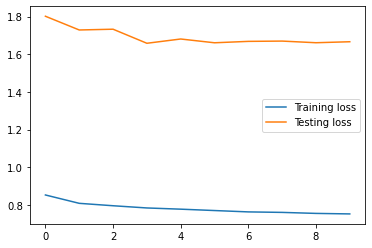

In [29]:
# Train the time series model, perform predictions and answer the three research questions
zero_houses = list(clustered_df[clustered_df['Cluster'] == 0]['House'])
print(zero_houses)
zero_cluster = Cluster(zero_houses)
zero_cluster_results = zero_cluster.results(model_name)
print('Training History for Cluster 0:')

In [ ]:
one_houses = list(clustered_df[clustered_df['Cluster'] == 1]['House'])
one_cluster = Cluster(one_houses)
one_cluster_results = one_cluster.results(model_name)
print('Training History for Cluster 1:')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 12, 128)           17280     
                                                                 
 lstm_2 (LSTM)               (None, 12, 32)            20608     
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 41,041
Trainable params: 41,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4218/4218 [==============================] - 55s 12ms/step - loss: 0.1337 - root_mean_squared_error: 0.3656 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error:

In [ ]:
two_houses = list(clustered_df[clustered_df['Cluster'] == 2]['House'])
two_cluster = Cluster(two_houses)
two_cluster_results = two_cluster.results(model_name)
print('Training History for Cluster 2:')

In [ ]:
three_houses = list(clustered_df[clustered_df['Cluster'] == 3]['House'])
three_cluster = Cluster(three_houses)
three_cluster_results = three_cluster.results(model_name)
print('Training History for Cluster 3:')

In [ ]:
four_houses = list(clustered_df[clustered_df['Cluster'] == 4]['House'])
four_cluster = Cluster(four_houses)
four_cluster_results = four_cluster.results(model_name)
print('Training History for Cluster 4:')

In [ ]:
# ## Save Scenario 1 models
# zero_cluster.model.save(f'Models/Scenario1/{model_name}/zero_cluster')
# one_cluster.model.save(f'Models/Scenario1/{model_name}/one_cluster')
# two_cluster.model.save(f'Models/Scenario1/{model_name}/two_cluster')
# three_cluster.model.save(f'Models/Scenario1/{model_name}/three_cluster')
# four_cluster.model.save(f'Models/Scenario1/{model_name}/four_cluster')

# ## Pickling cluster and cluster results
# zero_cluster_file = open(f"Models/Scenario1/Objects/{model_name}/zero_cluster.pickle", "wb")
# pickle.dump(zero_cluster, zero_cluster_file)
# zero_cluster_file.close()

# one_cluster_file = open(f"Models/Scenario1/Objects/{model_name}/one_cluster.pickle", "wb")
# pickle.dump(one_cluster, one_cluster_file)
# one_cluster_file.close()

# two_cluster_file = open(f"Models/Scenario1/Objects/{model_name}/two_cluster.pickle", "wb")
# pickle.dump(two_cluster, two_cluster_file)
# two_cluster_file.close()

# three_cluster_file = open(f"Models/Scenario1/Objects/{model_name}/three_cluster.pickle", "wb")
# pickle.dump(three_cluster, three_cluster_file)
# three_cluster_file.close()

# four_cluster_file = open(f"Models/Scenario1/Objects/{model_name}/four_cluster.pickle", "wb")
# pickle.dump(four_cluster, four_cluster_file)
# four_cluster_file.close()

# zero_cluster_results_file = open(f"Models/Scenario1/Objects/{model_name}/zero_cluster_results.pickle", "wb")
# pickle.dump(zero_cluster_results, zero_cluster_results_file)
# zero_cluster_results_file.close()

# one_cluster_results_file = open(f"Models/Scenario1/Objects/{model_name}/one_cluster_results.pickle", "wb")
# pickle.dump(one_cluster_results, one_cluster_results_file)
# one_cluster_results_file.close()

# two_cluster_results_file = open(f"Models/Scenario1/Objects/{model_name}/two_cluster_results.pickle", "wb")
# pickle.dump(two_cluster_results, two_cluster_results_file)
# two_cluster_results_file.close()

# three_cluster_results_file = open(f"Models/Scenario1/Objects/{model_name}/three_cluster_results.pickle", "wb")
# pickle.dump(three_cluster_results, three_cluster_results_file)
# three_cluster_results_file.close()

# four_cluster_results_file = open(f"Models/Scenario1/Objects/{model_name}/four_cluster_results.pickle", "wb")
# pickle.dump(four_cluster_results, four_cluster_results_file)
# four_cluster_results_file.close()

#### Scenario 2

In [ ]:
all_houses = list(clustered_df['House'])
all_cluster = Cluster(all_houses)
all_cluster_results = all_cluster.results(model_name)
print('Training History without clustering:')

In [ ]:
# ### Save Scenario 2 models
# all_cluster.model.save(f'Models/Scenario2/{model_name}/all_cluster')

# ## Pickling Scenario 2 cluster and cluster result files
# all_cluster_file = open(f"Models/Scenario2/Objects/{model_name}/all_cluster.pickle", "wb+")
# pickle.dump(all_cluster, all_cluster_file)
# all_cluster_file.close()

# all_cluster_results_file = open(f"Models/Scenario2/Objects/{model_name}/all_cluster_results.pickle", "wb+")
# pickle.dump(all_cluster_results, all_cluster_results_file)
# all_cluster_results_file.close()

#### Predictions Graph functions

In [ ]:
def x_axis_label_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    label = pd.Timestamp(label)
    month = label.month_name()[:3]
    #if month == 'Jan':
    month += f'\n{label.year}'
    return month

def graph_predictions(cluster_specific_results, all_results):
    first_house = list(cluster_specific_results.keys())[0]
    df1 = cluster_specific_results[first_house][['timestamp','energy_predicted', 'energy_kWh']]
    df1['timestamp'] = pd.to_datetime(df1['timestamp'])
    df1 = df1.set_index('timestamp')
    df1['energy_predicted_without_clustering']= np.array(all_results[first_house][['energy_predicted']])
    df1.rename({'energy_predicted':'energy_predicted_with_clustering', 'energy_kWh':'real_energy'},axis = 1, inplace = True)
    ax = df1[::300].plot.line(figsize=(20,10))
    #ax.set_xticklabels(map(x_axis_label_format, df1[::int(len(df1)/8)+1].index))
    #import matplotlib.dates as mdates
    #myFmt = mdates.DateFormatter('%Y-%m')
    #ax.xaxis.set_major_formatter(myFmt)
    ax.set_title(f'Predictions for house {first_house}')

#### Predictions for Scenario 1 and Scenario 2 

In [ ]:
graph_predictions(zero_cluster_results, all_cluster_results)
#df1 = zero_cluster_results[1][['timestamp','energy_predicted', 'energy_kWh']].set_index('timestamp')
#df1['energy_predicted_without_clustering']= np.array(all_cluster_results[1][['energy_predicted']])

In [ ]:
graph_predictions(one_cluster_results, all_cluster_results)

In [ ]:
graph_predictions(two_cluster_results, all_cluster_results)

In [ ]:
graph_predictions(three_cluster_results, all_cluster_results)

In [ ]:
graph_predictions(four_cluster_results, all_cluster_results)

### Function to create tables

In [ ]:
def create_metrics(scenario_results, val=False):
    # tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanSquaredError()
    if val == False:
        rmse = 'root_mean_squared_error'
        mae = 'mean_absolute_error'
        mape = 'mean_absolute_percentage_error'
        mse = 'mean_squared_error'
    else:
        rmse = 'val_root_mean_squared_error'
        mae = 'val_mean_absolute_error'
        mape = 'val_mean_absolute_percentage_error'
        mse = 'val_mean_squared_error'
        
    scenario_rmse = list(map(lambda x: x.history.history[rmse],scenario_results))
    scenario_mae = list(map(lambda x: x.history.history[mae],scenario_results))
    scenario_mape = list(map(lambda x: x.history.history[mape],scenario_results))
    scenario_mse = list(map(lambda x: x.history.history[mse],scenario_results))
    scenario_rmse = np.array(scenario_rmse).reshape(-1,)
    scenario_mae = np.array(scenario_mae).reshape(-1,)
    scenario_mape = np.array(scenario_mape).reshape(-1,)
    scenario_mse = np.array(scenario_mse).reshape(-1,)
    return [np.min(scenario_rmse),np.max(scenario_rmse),np.mean(scenario_rmse),np.min(scenario_mae),np.max(scenario_mae),np.mean(scenario_mae)
           ,np.min(scenario_mape),np.max(scenario_mape),np.mean(scenario_mape)
           ,np.min(scenario_mse),np.max(scenario_mse),np.mean(scenario_mse)]

#### Scenario 1 and Scenario 2 Metric Tables

In [ ]:
scenario_1_results = [zero_cluster, one_cluster, two_cluster, three_cluster, four_cluster]
scenario_1_metrics = create_metrics(scenario_1_results)
scenario_1_validation_metrics = create_metrics(scenario_1_results, val= True)
scenario_1_metrics

In [ ]:
scenario_1_validation_metrics

In [ ]:
scenario_2_results = [all_cluster]
scenario_2_metrics = create_metrics(scenario_2_results)
scenario_2_validation_metrics = create_metrics(scenario_2_results, val= True)
scenario_2_metrics

In [ ]:
scenario_2_validation_metrics

#### Scenario 3 and 4

In [ ]:
### Removing smart device features
House.cols = ['energy_kWh']
#House.cols

In [ ]:
scenario_3_zero_cluster = Cluster(zero_houses)
scenario_3_zero_cluster_results = scenario_3_zero_cluster.results(model_name)
print('Training History for Cluster 0:')

In [ ]:
scenario_3_one_cluster = Cluster(one_houses)
scenario_3_one_cluster_results = scenario_3_one_cluster.results(model_name)
print('Training History for Cluster 1:')

In [ ]:
scenario_3_two_cluster = Cluster(two_houses)
scenario_3_two_cluster_results = scenario_3_two_cluster.results(model_name)
print('Training History for Cluster 2:')

In [ ]:
scenario_3_three_cluster = Cluster(three_houses)
scenario_3_three_cluster_results = scenario_3_three_cluster.results(model_name)
print('Training History for Cluster 3:')

In [ ]:
scenario_3_four_cluster = Cluster(four_houses)
scenario_3_four_cluster_results = scenario_3_four_cluster.results(model_name)
print('Training History for Cluster 4:')

In [ ]:
# ## Save Scenario 3 models
# scenario_3_zero_cluster.model.save(f'Models/Scenario3/{model_name}/zero_cluster')
# scenario_3_one_cluster.model.save(f'Models/Scenario3/{model_name}/one_cluster')
# scenario_3_two_cluster.model.save(f'Models/Scenario3/{model_name}/two_cluster')
# scenario_3_three_cluster.model.save(f'Models/Scenario3/{model_name}/three_cluster')
# scenario_3_four_cluster.model.save(f'Models/Scenario3/{model_name}/four_cluster')

# # Pickling objects

# scenario_3_zero_cluster_file = open(f"Models/Scenario3/Objects/{model_name}/zero_cluster.pickle", "wb")
# pickle.dump(scenario_3_zero_cluster, scenario_3_zero_cluster_file)
# scenario_3_zero_cluster_file.close()

# scenario_3_one_cluster_file = open(f"Models/Scenario3/Objects/{model_name}/one_cluster.pickle", "wb")
# pickle.dump(scenario_3_one_cluster, scenario_3_one_cluster_file)
# scenario_3_one_cluster_file.close()

# scenario_3_two_cluster_file = open(f"Models/Scenario3/Objects/{model_name}/two_cluster.pickle", "wb")
# pickle.dump(scenario_3_two_cluster, scenario_3_two_cluster_file)
# scenario_3_two_cluster_file.close()

# scenario_3_three_cluster_file = open(f"Models/Scenario3/Objects/{model_name}/three_cluster.pickle", "wb")
# pickle.dump(scenario_3_three_cluster, scenario_3_three_cluster_file)
# scenario_3_three_cluster_file.close()

# scenario_3_four_cluster_file = open(f"Models/Scenario3/Objects/{model_name}/four_cluster.pickle", "wb")
# pickle.dump(scenario_3_four_cluster, scenario_3_four_cluster_file)
# scenario_3_four_cluster_file.close()

# scenario_3_zero_cluster_results_file = open(f"Models/Scenario3/Objects/{model_name}/zero_cluster_results.pickle", "wb")
# pickle.dump(scenario_3_zero_cluster_results, scenario_3_zero_cluster_results_file)
# scenario_3_zero_cluster_results_file.close()

# scenario_3_one_cluster_results_file = open(f"Models/Scenario3/Objects/{model_name}/one_cluster_results.pickle", "wb")
# pickle.dump(scenario_3_one_cluster_results, scenario_3_one_cluster_results_file)
# scenario_3_one_cluster_results_file.close()

# scenario_3_two_cluster_results_file = open(f"Models/Scenario3/Objects/{model_name}/two_cluster_results.pickle", "wb")
# pickle.dump(scenario_3_two_cluster_results, scenario_3_two_cluster_results_file)
# scenario_3_two_cluster_results_file.close()

# scenario_3_three_cluster_results_file = open(f"Models/Scenario3/Objects/{model_name}/three_cluster_results.pickle", "wb")
# pickle.dump(scenario_3_three_cluster_results, scenario_3_three_cluster_results_file)
# scenario_3_three_cluster_results_file.close()

# scenario_3_four_cluster_results_file = open(f"Models/Scenario3/Objects/{model_name}/four_cluster_results.pickle", "wb")
# pickle.dump(scenario_3_four_cluster_results, scenario_3_four_cluster_results_file)
# scenario_3_four_cluster_results_file.close()

#### Scenario 4

In [ ]:
scenario_4_all_cluster = Cluster(all_houses)
scenario_4_all_cluster_results = scenario_4_all_cluster.results(model_name)
print('Training History without clustering:')

In [ ]:
# ### Save Scenario 4 models
# scenario_4_all_cluster.model.save(f'Models/Scenario4/{model_name}/all_cluster')

# ## Pickling Scenario 4 cluster and cluster result files
# scenario_4_all_cluster_file = open(f"Models/Scenario4/{model_name}/all_cluster.pickle", "wb")
# pickle.dump(scenario_4_all_cluster, scenario_4_all_cluster_file)
# scenario_4_all_cluster_file.close()

# scenario_4_all_cluster_results_file = open(f"Models/Scenario4/{model_name}/all_cluster_results.pickle", "wb")
# pickle.dump(scenario_4_all_cluster_results, scenario_4_all_cluster_results_file)
# scenario_4_all_cluster_results_file.close()

#### Predictions for Scenario 3 and Scenario 4

In [ ]:
graph_predictions(scenario_3_zero_cluster_results, scenario_4_all_cluster_results)

In [ ]:
graph_predictions(scenario_3_one_cluster_results, scenario_4_all_cluster_results)

In [ ]:
graph_predictions(scenario_3_two_cluster_results, scenario_4_all_cluster_results)

In [ ]:
graph_predictions(scenario_3_three_cluster_results, scenario_4_all_cluster_results)

In [ ]:
graph_predictions(scenario_3_four_cluster_results, scenario_4_all_cluster_results)

#### Scenario 3 and Scenario 4 Metric Tables

In [ ]:
scenario_3_results = [scenario_3_zero_cluster, scenario_3_one_cluster, scenario_3_two_cluster, scenario_3_three_cluster, scenario_3_four_cluster]
scenario_3_metrics = create_metrics(scenario_3_results )
scenario_3_validation_metrics = create_metrics(scenario_3_results, val= True)
scenario_3_metrics

In [ ]:
scenario_3_validation_metrics

In [ ]:
scenario_4_results = [scenario_4_all_cluster]
scenario_4_metrics = create_metrics(scenario_4_results )
scenario_4_validation_metrics = create_metrics(scenario_4_results, val= True)
scenario_4_metrics

In [ ]:
scenario_4_validation_metrics

In [ ]:
print('Training metrics:')
df = pd.DataFrame([scenario_1_metrics, scenario_2_metrics, scenario_3_metrics, scenario_4_metrics],index=[1,2,3,4], columns = ['Min RMSE', 'Max RMSE', 'Mean RMSE','Min MAE', 'Max MAE', 'Mean MAE',
                                                                                                                              'Min MAPE', 'Max MAPE', 'Mean MAPE',
                                                                                                                              'Min MSE', 'Max MSE', 'Mean MSE'])
df['Scenario'] = np.array([1,2,3,4])
df.set_index('Scenario').round(decimals=2).to_csv(f'Tables/{model_name}_Standardized_training_metrics.csv')
df

In [ ]:
print('Validation metrics:')
df = pd.DataFrame([scenario_1_validation_metrics, scenario_2_validation_metrics,
                   scenario_3_validation_metrics, scenario_4_validation_metrics],index=[1,2,3,4], columns = ['Min RMSE', 'Max RMSE', 'Mean RMSE','Min MAE', 'Max MAE', 'Mean MAE',
                                                                                                                              'Min MAPE', 'Max MAPE', 'Mean MAPE',
                                                                                                                              'Min MSE', 'Max MSE', 'Mean MSE'])
df['Scenario'] = np.array([1,2,3,4])
df.set_index('Scenario').round(decimals=2).to_csv(f'Tables/{model_name}_Standardized_validation_metrics.csv')
df

### Anomaly Distribution

In [ ]:
def create_anomaly_df(result_df, scenario_name, monthly_agg = True, only2017=False):    
    #print(type(result_df))
    anomaly_df = result_df[['timestamp', 'Anomaly detected']]
    if only2017:
        anomaly_df = anomaly_df[(anomaly_df['timestamp'] <= '2017-12-31') & (anomaly_df['timestamp'] >= '2017-01-01')]
    anomaly_df.set_index('timestamp', inplace = True)
    if monthly_agg:
        anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else 1)
        anomaly_df = anomaly_df.resample("M").agg('sum')
    else: 
        anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else x)
    anomaly_df = anomaly_df.rename(columns={'Anomaly detected': scenario_name})
    return anomaly_df

def create_anomalies_graph( title = None,only2017=False, **kwargs):
    anomaly_dfs = []
    for scenario_name, result_df in kwargs.items():
        anomaly_df = create_anomaly_df(result_df, scenario_name, only2017=only2017)
        anomaly_dfs.append(anomaly_df)
    anomaly_df = functools.reduce(lambda left, right: left.join(right), anomaly_dfs)
    ax = anomaly_df.plot.line(figsize=(20,10))
    ax.set_xlabel(f'Time')
    ax.set_ylabel(f'Frequency')
    ax.set_title(title)
    #return anomaly_dfs


In [ ]:
def dtw_distance(series1, series2):
    return fastdtw.fastdtw(series1,series2)[0]

def create_distance_df(title, **kwargs):
    print(title)
    anomaly_dfs = []
    for scenario_name, result_df in kwargs.items():
        anomaly_df = np.array(create_anomaly_df(result_df, scenario_name, monthly_agg=False)).reshape(1,-1)
        anomaly_dfs.append(anomaly_df)
    anomaly_distributions = np.array(anomaly_dfs).reshape(len(kwargs),-1)
    distance_matrix = sd.squareform(sd.pdist(anomaly_distributions, dtw_distance))
    return(pd.DataFrame(distance_matrix, columns = kwargs.keys(), index = kwargs.keys()))
    #return anomaly_dfs


In [ ]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 14: Cluster 0', Scenario1 = zero_cluster_results[14], Scenario2 = all_cluster_results[14],
                       Scenario3 = scenario_3_zero_cluster_results[14], Scenario4 = scenario_4_all_cluster_results[14])

In [ ]:
create_distance_df('Similarity between anomaly distributions for House 14: Cluster 0', Scenario1 = zero_cluster_results[14], Scenario2 = all_cluster_results[14],
                       Scenario3 = scenario_3_zero_cluster_results[14], Scenario4 = scenario_4_all_cluster_results[14]).round(decimals=2).to_csv('Tables/anomaly_cluster0.csv')

In [ ]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 2: Cluster 1', Scenario1 = one_cluster_results[2], Scenario2 = all_cluster_results[2],
                       Scenario3 = scenario_3_one_cluster_results[2], Scenario4 = scenario_4_all_cluster_results[2])

In [ ]:
create_distance_df( 'Similarity between anomaly distributions for House2: Cluster 1', Scenario1 = one_cluster_results[2], Scenario2 = all_cluster_results[2],
                       Scenario3 = scenario_3_one_cluster_results[2], Scenario4 = scenario_4_all_cluster_results[2]).round(decimals=2).to_csv('Tables/anomaly_cluster1.csv')

In [ ]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 15: Cluster 2', Scenario1 = two_cluster_results[15], Scenario2 = all_cluster_results[15],
                       Scenario3 = scenario_3_two_cluster_results[15], Scenario4 = scenario_4_all_cluster_results[15])

In [ ]:
create_distance_df( 'Similarity between anomaly distributions for House 15: Cluster 2', Scenario1 = two_cluster_results[15], Scenario2 = all_cluster_results[15],
                       Scenario3 = scenario_3_two_cluster_results[15], Scenario4 = scenario_4_all_cluster_results[15]).round(decimals=2).to_csv('Tables/anomaly_cluster2.csv')

In [ ]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 5: Cluster 3', Scenario1 = three_cluster_results[5], Scenario2 = all_cluster_results[5],
                       Scenario3 = scenario_3_three_cluster_results[5], Scenario4 = scenario_4_all_cluster_results[5])

In [ ]:
create_distance_df( 'Similarity between anomaly distributions for House 5: Cluster 3', Scenario1 = three_cluster_results[5], Scenario2 = all_cluster_results[5],
                       Scenario3 = scenario_3_three_cluster_results[5], Scenario4 = scenario_4_all_cluster_results[5]).round(decimals=2).to_csv('Tables/anomaly_cluster3.csv')

In [ ]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 3: Cluster 4', Scenario1 = four_cluster_results[3], Scenario2 = all_cluster_results[3],
                       Scenario3 = scenario_3_four_cluster_results[3], Scenario4 = scenario_4_all_cluster_results[3])

In [ ]:
create_distance_df( 'Similarity between anomaly distributions for House 3: Cluster 4', Scenario1 = four_cluster_results[3], Scenario2 = all_cluster_results[3],
                       Scenario3 = scenario_3_four_cluster_results[3], Scenario4 = scenario_4_all_cluster_results[3]).round(decimals=2).to_csv('Tables/anomaly_cluster3.csv')

##### 2017 Graphs

In [ ]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 14: Cluster 0',only2017=True, Scenario1 = zero_cluster_results[14], Scenario2 = all_cluster_results[14],
                       Scenario3 = scenario_3_zero_cluster_results[14], Scenario4 = scenario_4_all_cluster_results[14])

In [ ]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 2: Cluster 1',only2017=True, Scenario1 = one_cluster_results[2], Scenario2 = all_cluster_results[2],
                       Scenario3 = scenario_3_one_cluster_results[2], Scenario4 = scenario_4_all_cluster_results[2])

In [ ]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 15: Cluster 2',only2017=True,Scenario1 = two_cluster_results[15], Scenario2 = all_cluster_results[15],
                       Scenario3 = scenario_3_two_cluster_results[15], Scenario4 = scenario_4_all_cluster_results[15])

In [ ]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 5: Cluster 3',only2017=True, Scenario1 = three_cluster_results[5], Scenario2 = all_cluster_results[5],
                       Scenario3 = scenario_3_three_cluster_results[5], Scenario4 = scenario_4_all_cluster_results[5])

In [ ]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 3: Cluster 4',only2017=True, Scenario1 = four_cluster_results[3], Scenario2 = all_cluster_results[3],
                       Scenario3 = scenario_3_four_cluster_results[3], Scenario4 = scenario_4_all_cluster_results[3])

#### Energy Deficit Calculation

In [ ]:
def create_deficit_df(result_df, scenario_name, monthly_agg = True, only2017=False):    
    #print(type(result_df))
    energy_df = result_df[['timestamp', 'Energy Deficit Flag']]
    if only2017:
        energy_df = energy_df[(energy_df['timestamp'] <= '2017-12-31') & (energy_df['timestamp'] >= '2017-01-01')]
    energy_df.set_index('timestamp', inplace = True)
    if monthly_agg:
        energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else 1)
        energy_df = energy_df.resample("W").agg('sum')
    else: 
        energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else x)
    energy_df = energy_df.rename(columns={'Energy Deficit Flag': scenario_name})
    
    
    return energy_df

def create_energy_deficit_graph( title = None,only2017=False, **kwargs):
    energy_dfs = []
    for scenario_name, result_df in kwargs.items():
        energy_df = create_deficit_df(result_df, scenario_name, only2017=only2017)
        energy_dfs.append(energy_df)
    energy_df = functools.reduce(lambda left, right: left.join(right), energy_dfs)
    ax = energy_df.plot.line(figsize=(20,10))
    ax.set_xlabel(f'Time')
    ax.set_ylabel(f'Frequency')
    ax.set_title(title)

In [ ]:
def create_deficit_distance_df(title, **kwargs):
    print(title)
    energy_dfs = []
    for scenario_name, result_df in kwargs.items():
        energy_df = np.array(create_deficit_df(result_df, scenario_name, monthly_agg=False)).reshape(1,-1)
        energy_dfs.append(energy_df)
    energy_distributions = np.array(energy_dfs).reshape(len(kwargs),-1)
    distance_matrix = sd.squareform(sd.pdist(energy_distributions, dtw_distance))
    return(pd.DataFrame(distance_matrix, columns = kwargs.keys(), index = kwargs.keys()))

In [ ]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 14: Cluster 0', Scenario1 = zero_cluster_results[14], Scenario2 = all_cluster_results[14],
                       Scenario3 = scenario_3_zero_cluster_results[14], Scenario4 = scenario_4_all_cluster_results[14])

In [ ]:
create_deficit_distance_df('Similarity between energy deficit distributions for House 14: Cluster 0', Scenario1 = zero_cluster_results[14], Scenario2 = all_cluster_results[14],
                       Scenario3 = scenario_3_zero_cluster_results[14], Scenario4 = scenario_4_all_cluster_results[14])

In [ ]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 2: Cluster 1', Scenario1 = one_cluster_results[2], Scenario2 = all_cluster_results[2],
                       Scenario3 = scenario_3_one_cluster_results[2], Scenario4 = scenario_4_all_cluster_results[2])

In [ ]:
create_deficit_distance_df( 'Similarity between energy deficit distributions for House2: Cluster 1', Scenario1 = one_cluster_results[2], 
                    Scenario2 = all_cluster_results[2],
                       Scenario3 = scenario_3_one_cluster_results[2], Scenario4 = scenario_4_all_cluster_results[2])

In [ ]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 15: Cluster 2', Scenario1 = two_cluster_results[15], Scenario2 = all_cluster_results[15],
                       Scenario3 = scenario_3_two_cluster_results[15], Scenario4 = scenario_4_all_cluster_results[15])

In [ ]:
create_deficit_distance_df( 'Similarity between energy deficit distributions for House 15: Cluster 2', Scenario1 = two_cluster_results[15], Scenario2 = all_cluster_results[15],
                       Scenario3 = scenario_3_two_cluster_results[15], Scenario4 = scenario_4_all_cluster_results[15])

In [ ]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 5: Cluster 3', Scenario1 = three_cluster_results[5], Scenario2 = all_cluster_results[5],
                       Scenario3 = scenario_3_three_cluster_results[5], Scenario4 = scenario_4_all_cluster_results[5])

In [ ]:
create_deficit_distance_df( 'Similarity between energy deficit distributions for House 5: Cluster 3', Scenario1 = three_cluster_results[5], Scenario2 = all_cluster_results[5],
                       Scenario3 = scenario_3_three_cluster_results[5], Scenario4 = scenario_4_all_cluster_results[5])

In [ ]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 3: Cluster 4', Scenario1 = four_cluster_results[3], Scenario2 = all_cluster_results[3],
                       Scenario3 = scenario_3_four_cluster_results[3], Scenario4 = scenario_4_all_cluster_results[3])

In [ ]:
create_deficit_distance_df( 'Similarity between energy deficit distributions for House 3: Cluster 4', Scenario1 = four_cluster_results[3], Scenario2 = all_cluster_results[3],
                       Scenario3 = scenario_3_four_cluster_results[3], Scenario4 = scenario_4_all_cluster_results[3])

#### 2017 deficit graphs

In [ ]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 14: Cluster 0',only2017=True, Scenario1 = zero_cluster_results[14], Scenario2 = all_cluster_results[14],
                       Scenario3 = scenario_3_zero_cluster_results[14], Scenario4 = scenario_4_all_cluster_results[14])

In [ ]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 2: Cluster 1',only2017=True, Scenario1 = one_cluster_results[2], Scenario2 = all_cluster_results[2],
                       Scenario3 = scenario_3_one_cluster_results[2], Scenario4 = scenario_4_all_cluster_results[2])

In [ ]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 15: Cluster 2',only2017=True, Scenario1 = two_cluster_results[15], Scenario2 = all_cluster_results[15],
                       Scenario3 = scenario_3_two_cluster_results[15], Scenario4 = scenario_4_all_cluster_results[15])

In [ ]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 5: Cluster 3',only2017=True, Scenario1 = three_cluster_results[5], Scenario2 = all_cluster_results[5],
                       Scenario3 = scenario_3_three_cluster_results[5], Scenario4 = scenario_4_all_cluster_results[5])

In [ ]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 3: Cluster 4',only2017=True, Scenario1 = four_cluster_results[3], Scenario2 = all_cluster_results[3],
                       Scenario3 = scenario_3_four_cluster_results[3], Scenario4 = scenario_4_all_cluster_results[3])

In [ ]:
scenario_4_all_cluster_results_file = open(f"Models/Scenario4/Objects/{model_name}/all_cluster_results.pickle", "wb")
pickle.dump(scenario_4_all_cluster_results, scenario_4_all_cluster_results_file)
scenario_4_all_cluster_results_file.close()